对于相关系数矩阵，我们可以直接使用pandas中Dataframe类型的参数corr()得出，也可以使用numpy中corrcoef方法

相关系数&相关系数矩阵：
一般来说，样本是由多维特征组成的。把每一个特征维度看作变量，相关系数就是来表达两变量之间
的相关程度。两两变量之间的相关系数组成的矩阵就称为相关系数矩阵。

计算公式：

In [1]:
from IPython.display import Latex
Latex(r"$r = \frac{E[(X_i - E(X_i))(X_j - E(X_j))]}{\sqrt{E[(X_i - E(X_i))^2]E{(X_j - E(X_j))^2}}}$")

<IPython.core.display.Latex object>

In [2]:
import pandas as pd
data_train = pd.read_csv("./train.csv")
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# 利用corr属性可直接得出相关系数矩阵
mat = data_train.corr()

注意这个是不包括一些非数值类型的数据和离散型数据

# 绘制热力图

热力图要使用到seaborn.heatmap模块，简单的热力图只需要传入个相关系数矩阵可以实现

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

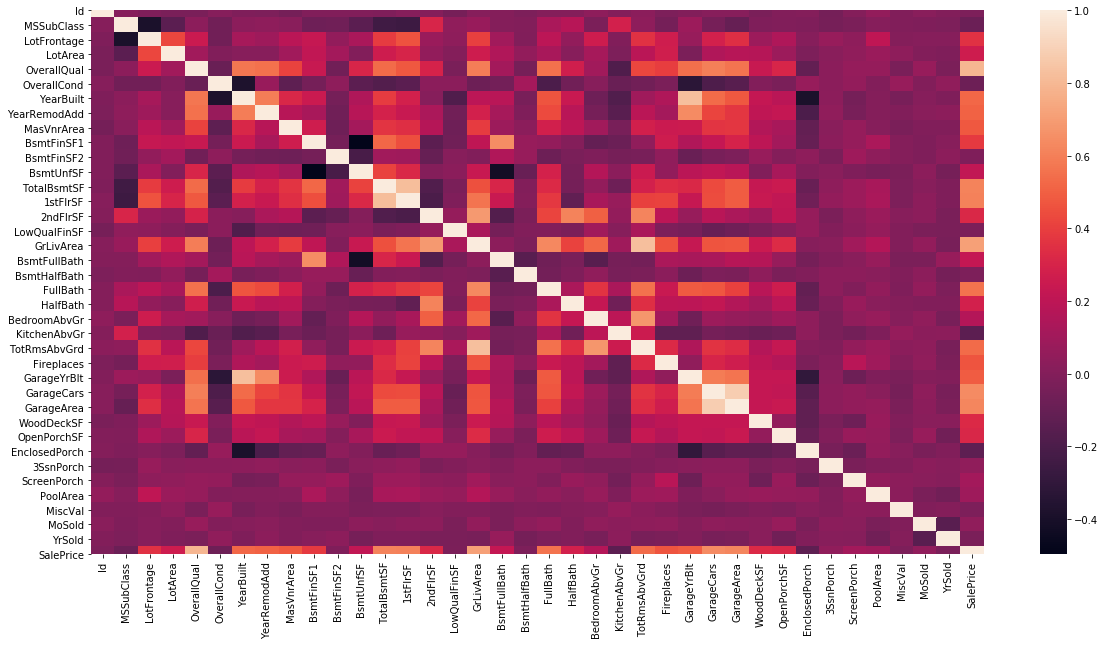

In [5]:
plt.subplots(figsize=(20, 10))  # 控制图像大小
sns.heatmap(mat)  # 传入相关系数矩阵，绘制热力图

对于这样子的图我们在查看这些坐标时就很费眼了，于是我们可以设置参数square
该参数可以控制热力图矩阵小块形状，默认值是False。虽然不知道怎么控制法，但
确实加上去后坐标轴上的标签要更容易看,小块的形状也全部变成了方块

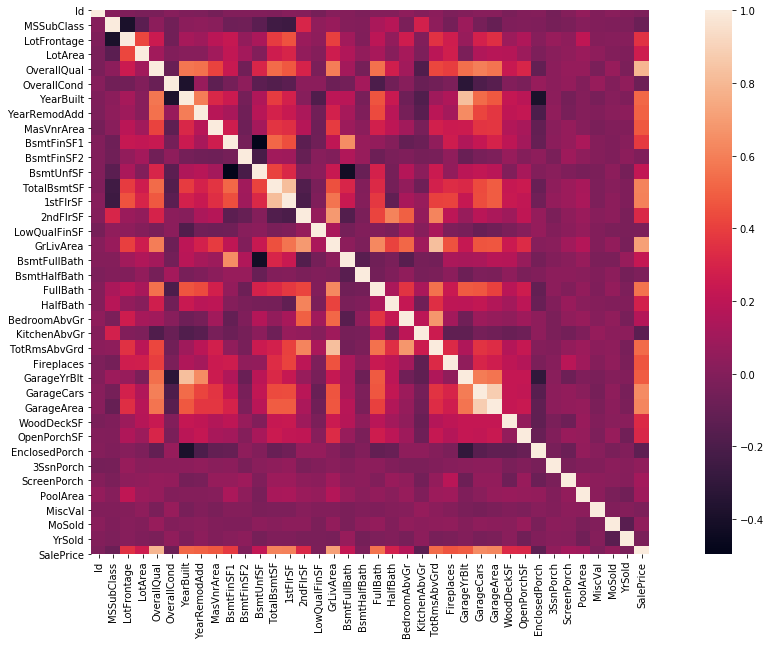

In [6]:
plt.subplots(figsize=(20, 10))  # 控制图像大小
sns.heatmap(mat, square=True)  # 传入相关系数矩阵，绘制热力图

同时还可以在热力图显示出之前计算出的相关系数矩阵，每个相关系数在热力图中相对应的小块中
显示出来。这里解释一下相对上面增加的参数

cbar:是否在热力图侧边绘制颜色刻度条，默认值是True（为了方便观察，感觉还是加上会比较好）

annot(annotate的缩写):默认取值False；如果是True，在热力图每个方格写入数据；如果是矩阵，                在热力图每个方格写入该矩阵对应位置数据

annot_kws:默认取值False；如果是True，设置热力图矩阵上数字的大小颜色字体

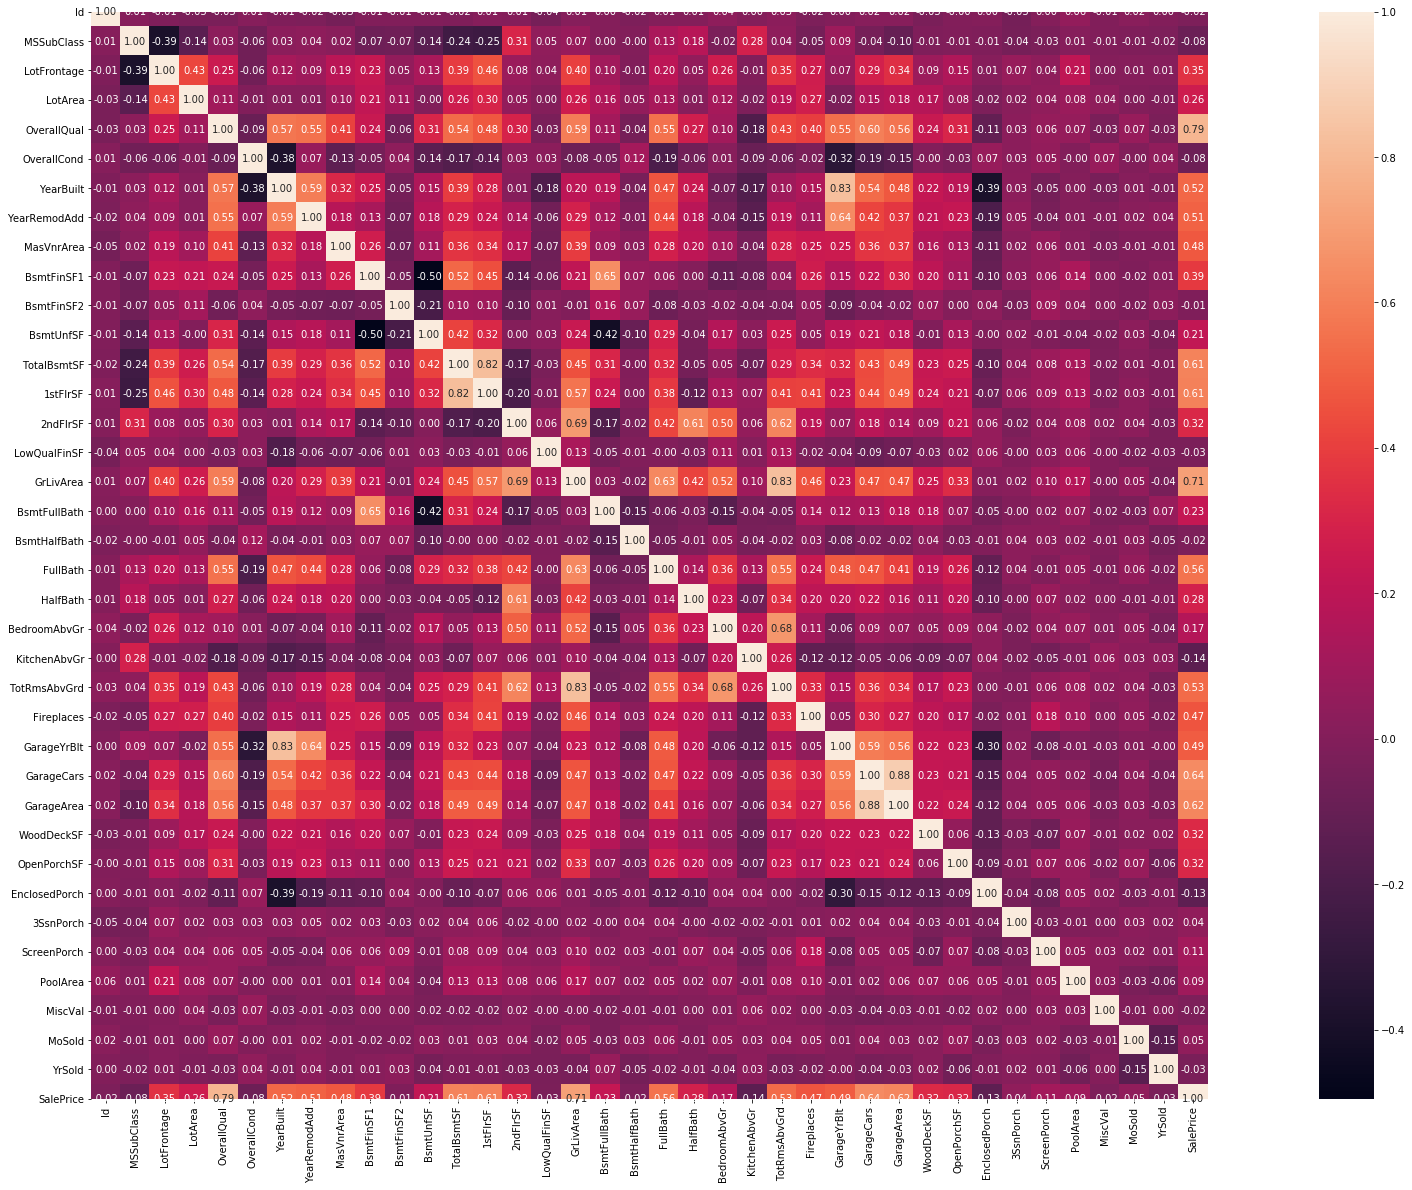

In [7]:
plt.subplots(figsize=(40, 20))
hm = sns.heatmap(mat, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

全部画出来看上去有点乱，所以下面会使用前十个与SalePrice最相关的特征绘制热力图，使用到nlargest()函数。
顺便讲到另一种计算相关系数矩阵的方法

In [8]:
cols = mat.nlargest(10, 'SalePrice').index  # 提取与最后目标值最相关的前十个特征标签
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [9]:
data_train[cols].values.T  # 获取这些特征值并转置为后面方便计算相关系数矩阵

array([[208500, 181500, 223500, ..., 266500, 142125, 147500],
       [     7,      6,      7, ...,      7,      5,      5],
       [  1710,   1262,   1786, ...,   2340,   1078,   1256],
       ...,
       [     2,      2,      2, ...,      2,      1,      1],
       [     8,      6,      6, ...,      9,      5,      6],
       [  2003,   1976,   2001, ...,   1941,   1950,   1965]], dtype=int64)

注意这里要使用np.corrcoef方法计算相关系数矩阵的时候要使用特征值经转置过后的array数组
也就是上一个单元格所展示的样子

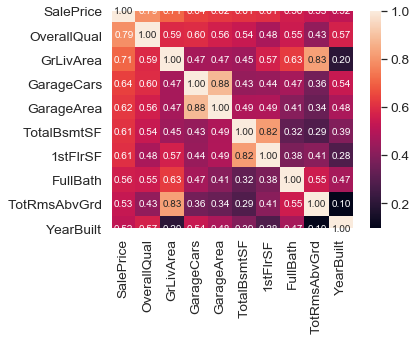

In [10]:
cm = np.corrcoef(data_train[cols].values.T)  # 计算相关系数矩阵
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()